# Flight Price Prediction
---

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [35]:
train_data = pd.read_excel(r"flight_price_train.xlsx")

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [38]:
train_data.shape

(10683, 11)

In [39]:
train_data.info()
'''It is clearly visible that only Route Column
   has just 1 missing value '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


'It is clearly visible that only Route Column\n   has just 1 missing value '

In [40]:
train_data.shape #SHAPE of the DATA

(10683, 11)

In [41]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
29h 40m      1
29h 30m      1
36h 25m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

In [42]:
train_data.dropna(inplace = True) #Drop Null Values as there is only 1

In [43]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [44]:
train_data["Date_of_Journey"].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [45]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day #Extracting Day

In [46]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month #Extracting Month

In [47]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [48]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [49]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [50]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [51]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [52]:
train_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [53]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [54]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [55]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [56]:
train_data.drop(["Duration"], axis = 1, inplace = True)

---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [57]:
for i in list(train_data.columns): #Checking the number of unique values in each feature
    print(i,'\t')
    print(len(train_data[i].unique()))

Airline 	
12
Source 	
5
Destination 	
6
Route 	
128
Total_Stops 	
5
Additional_Info 	
10
Price 	
1870
Journey_day 	
10
Journey_month 	
4
Dep_hour 	
24
Dep_min 	
12
Arrival_hour 	
24
Arrival_min 	
12
Duration_hours 	
44
Duration_mins 	
12


In [58]:
train_data[train_data['Duration_hours'] == 0] #Unusual value we will drop it

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,16,50,16,55,0,5


In [59]:
train_data = train_data[train_data['Duration_hours'] != 0]

In [60]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [61]:
train_data.groupby("Airline")['Price'].median()

Airline
Air Asia                              5162
Air India                             9443
GoAir                                 5135
IndiGo                                5000
Jet Airways                          11467
Jet Airways Business                 54747
Multiple carriers                    10197
Multiple carriers Premium economy    11269
SpiceJet                              3873
Trujet                                4140
Vistara                               7980
Vistara Premium economy               9125
Name: Price, dtype: int64

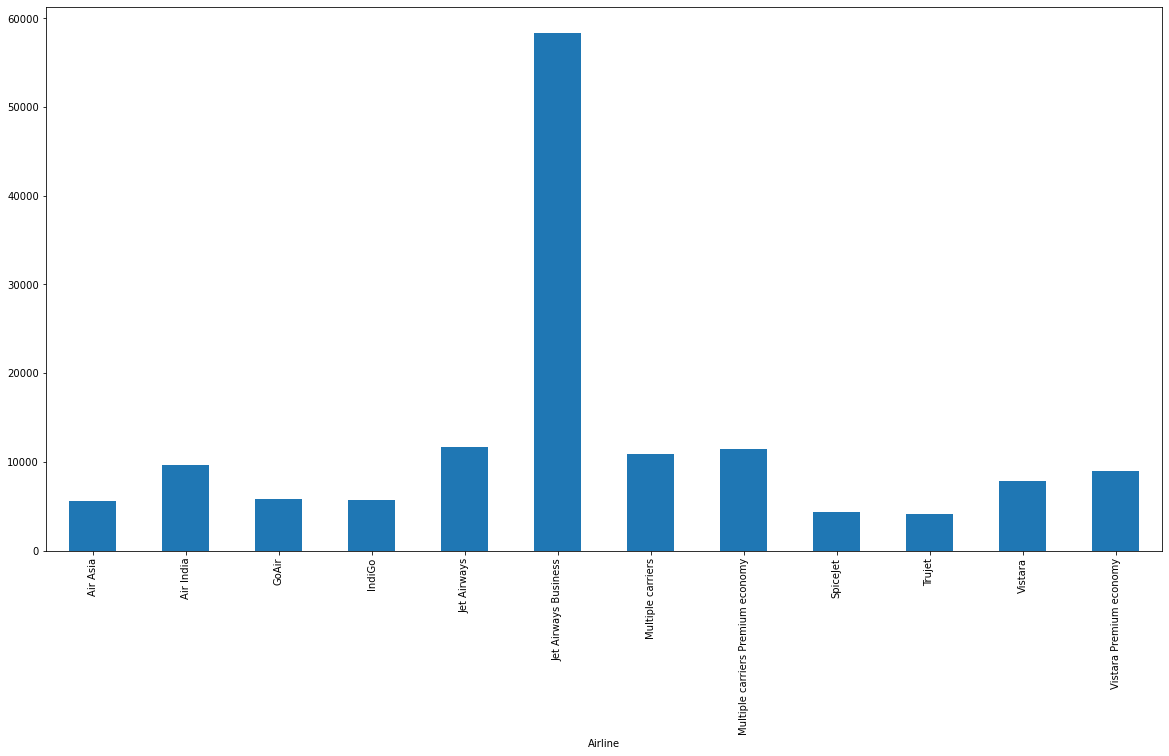

In [62]:
plt.figure(figsize=(20,10))
train_data.groupby("Airline")['Price'].mean().plot(kind = 'bar')
plt.show()

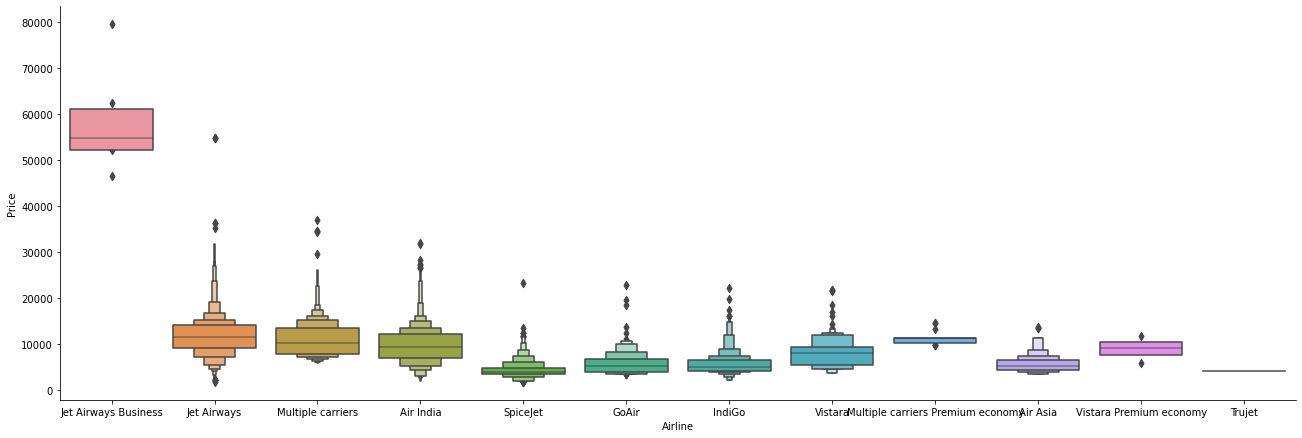

In [63]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [64]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [65]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

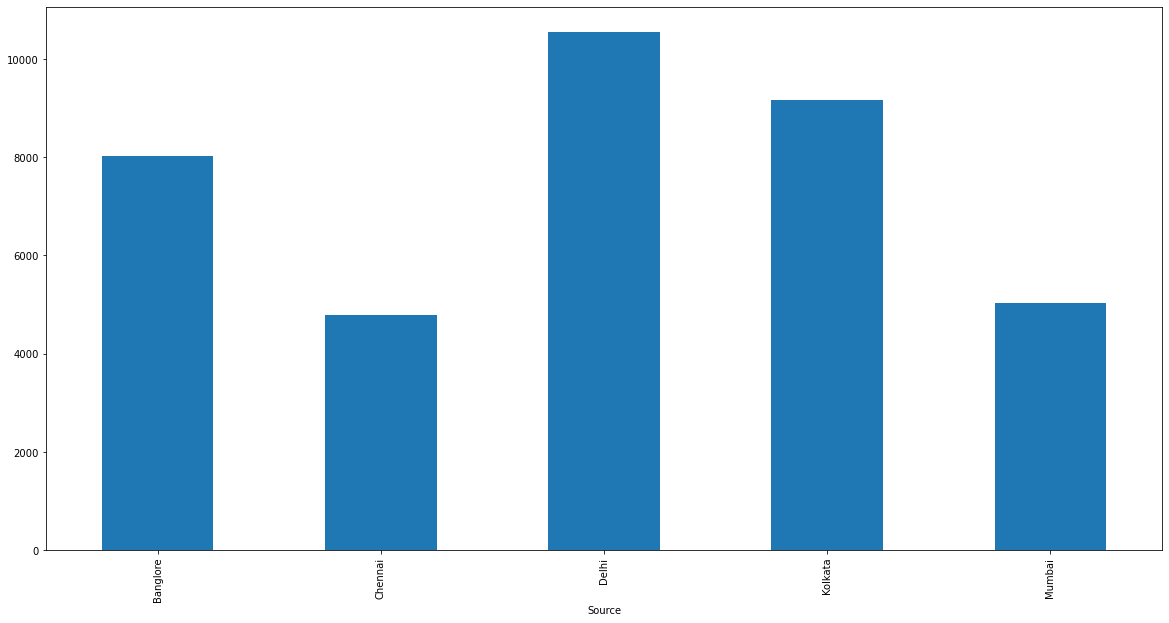

In [66]:
plt.figure(figsize=(20,10))
train_data.groupby("Source")['Price'].mean().plot(kind = 'bar')
plt.show()

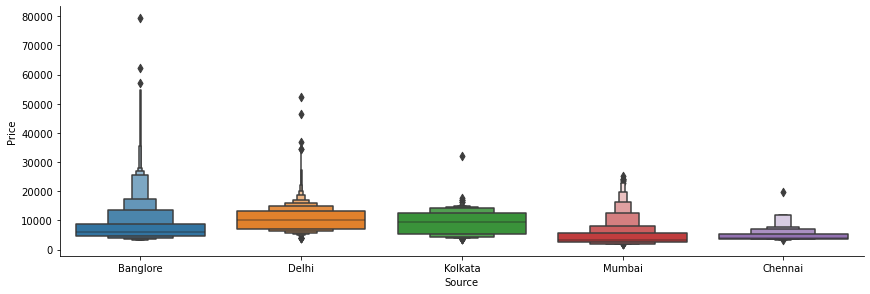

In [67]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [68]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [69]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

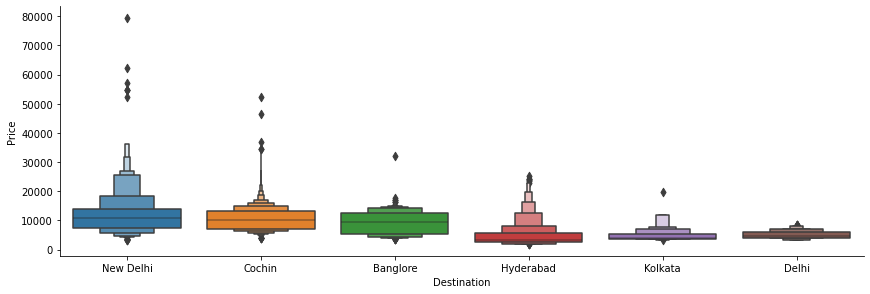

In [70]:
# Destination vs Price

sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

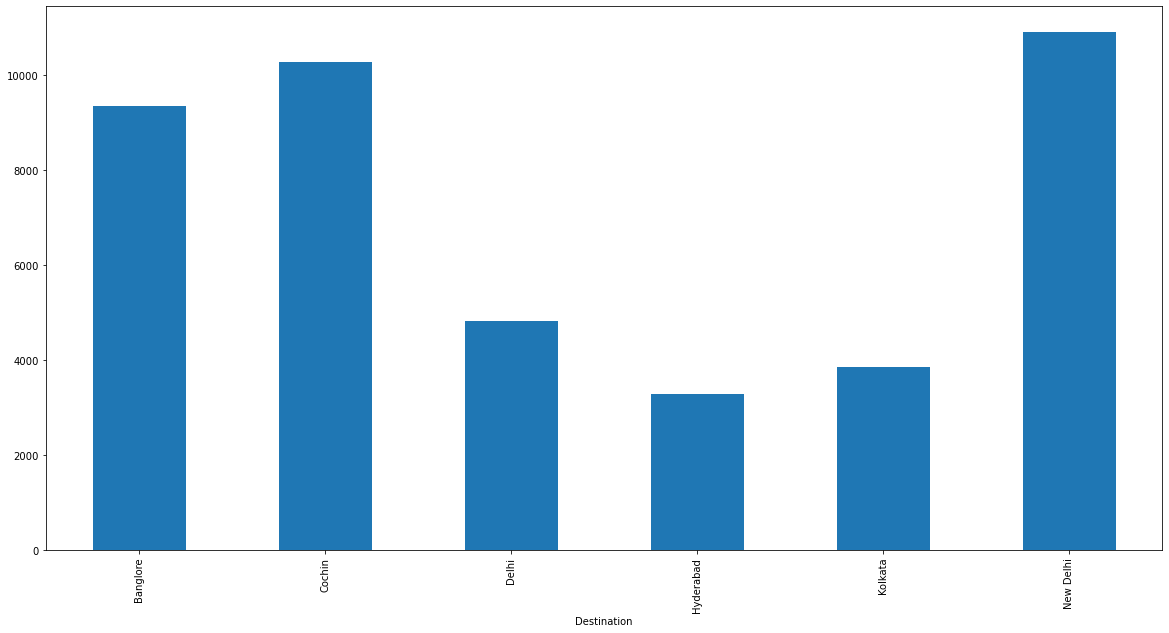

In [71]:
plt.figure(figsize=(20,10))
train_data.groupby("Destination")['Price'].median().plot(kind = 'bar')
plt.show()

In [72]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [73]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10681, dtype: object

In [74]:
train_data['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

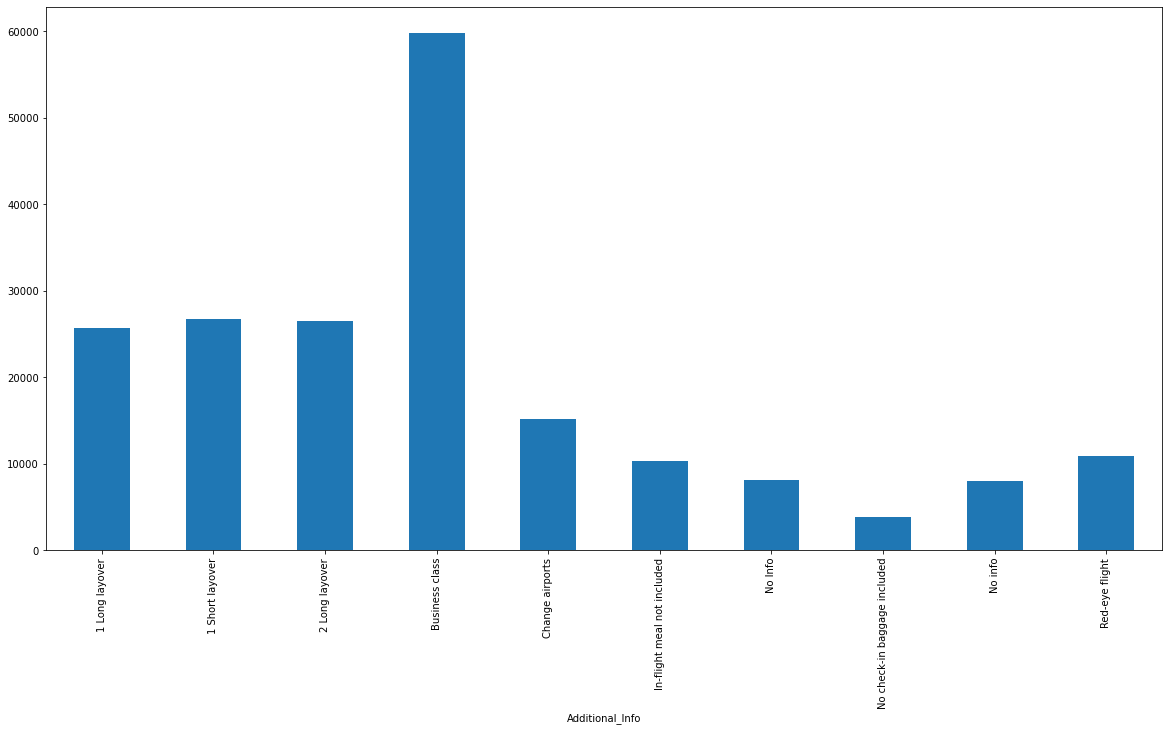

In [75]:
plt.figure(figsize=(20,10))
train_data.groupby("Additional_Info")['Price'].median().plot(kind = 'bar')
plt.show()

In [76]:
train_data['Additional_Info'] = np.where(
    train_data["Additional_Info"] == '1 Short layover', 'Any layover',
    train_data["Additional_Info"])
train_data['Additional_Info'] = np.where(
    train_data["Additional_Info"] == '1 Long layover', 'Any layover',
    train_data["Additional_Info"])
train_data['Additional_Info'] = np.where(
    train_data["Additional_Info"] == '2 Long layover', 'Any layover',
    train_data["Additional_Info"])
train_data['Additional_Info'] = np.where(
    train_data["Additional_Info"] == 'No Info', 'No info',
    train_data["Additional_Info"])
train_data['Additional_Info'] = np.where(
    train_data["Additional_Info"] == 'Red-eye flight', 'No info',
    train_data["Additional_Info"])
train_data['Additional_Info'] = np.where(
    train_data["Additional_Info"] == 'Change airports', 'No info',
    train_data["Additional_Info"])

Additional_info = train_data["Additional_Info"]
Additional_info = pd.get_dummies(Additional_info)

Additional_info.drop('No info', axis=1, inplace=True)
Additional_info.head()

,Any layover,Business class,In-flight meal not included,No check-in baggage included
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [77]:
train_data['Additional_Info'].value_counts()

No info                         8354
In-flight meal not included     1982
No check-in baggage included     320
Any layover                       21
Business class                     4
Name: Additional_Info, dtype: int64

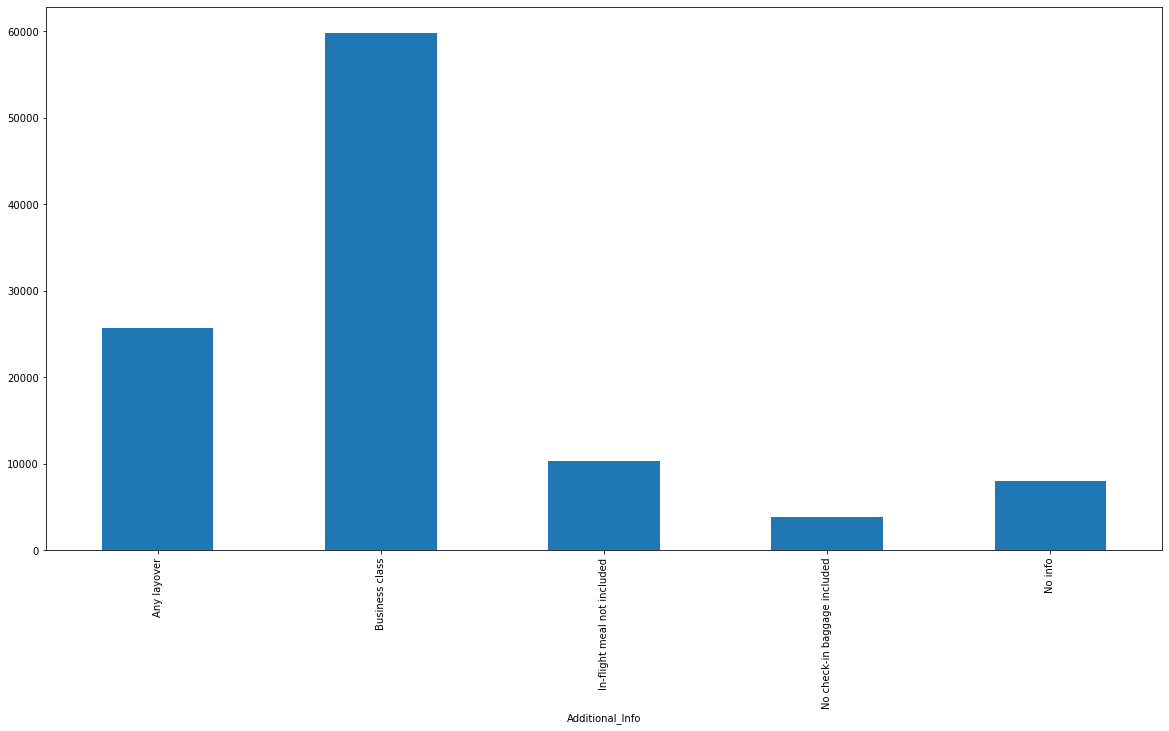

In [78]:
plt.figure(figsize=(20,10))
train_data.groupby("Additional_Info")['Price'].median().plot(kind = 'bar')
plt.show()

In [79]:
# Route and Total_Stops are related to each other

train_data.drop(["Route"], axis = 1, inplace = True)

In [80]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

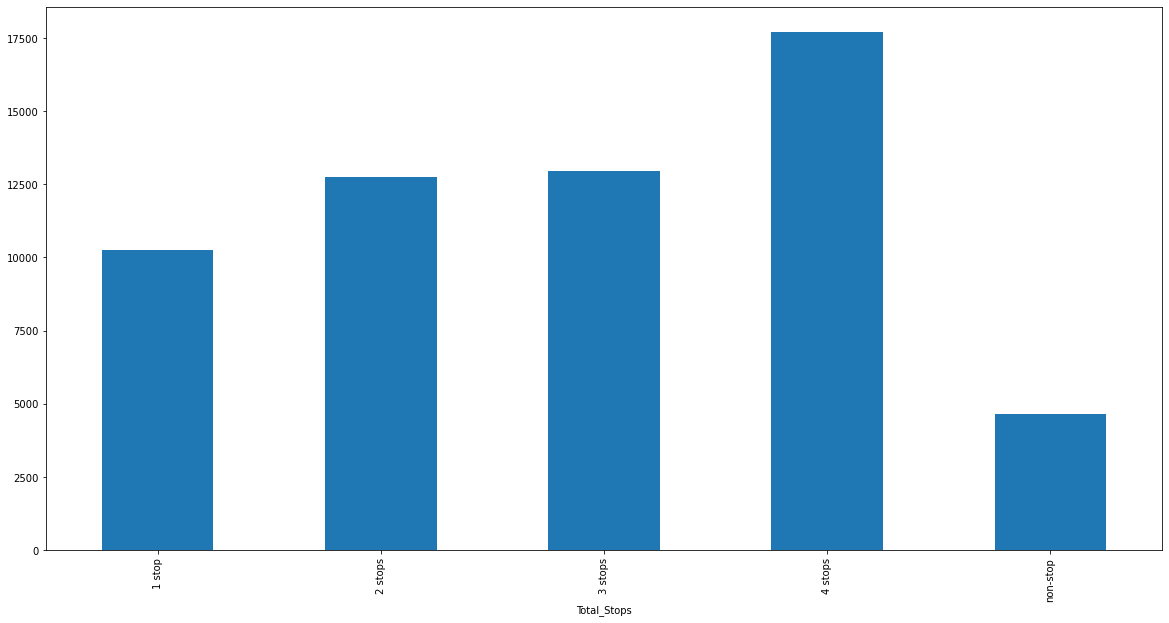

In [81]:
plt.figure(figsize=(20,10))
train_data.groupby("Total_Stops")['Price'].median().plot(kind = 'bar')
plt.show()

In [82]:
Total_Stops = pd.get_dummies(train_data['Total_Stops'],prefix="Total")
Total_Stops = Total_Stops.iloc[:,0:4]

In [83]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [84]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination,Additional_info,Total_Stops], axis = 1)

In [85]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Any layover,Business class,In-flight meal not included,No check-in baggage included,Total_1 stop,Total_2 stops,Total_3 stops,Total_4 stops
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [86]:
data_train.drop(["Airline", "Source", "Destination","Additional_Info", "Total_Stops"], axis = 1, inplace = True)

In [87]:
data_train.head()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Any layover,Business class,In-flight meal not included,No check-in baggage included,Total_1 stop,Total_2 stops,Total_3 stops,Total_4 stops
0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [88]:
data_train.shape

(10681, 37)

---

## Test set

In [89]:
test_data = pd.read_excel("flight_price_test.xlsx")

In [90]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [91]:
test_data["Additional_Info"].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [92]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True,prefix = 'Airline')

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True, prefix = 'Source')

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True, prefix = 'Destination')

test_data['Additional_Info'] = np.where(test_data["Additional_Info"] == '1 Short layover' , 'Any layover',test_data["Additional_Info"] )
test_data['Additional_Info'] = np.where(test_data["Additional_Info"] == '1 Long layover' , 'Any layover',test_data["Additional_Info"] )
test_data['Additional_Info'] = np.where(test_data["Additional_Info"] == '2 Long layover' , 'Any layover',test_data["Additional_Info"] )
test_data['Additional_Info'] = np.where(test_data["Additional_Info"] == 'No Info' , 'No info',test_data["Additional_Info"] )
test_data['Additional_Info'] = np.where(test_data["Additional_Info"] == 'Red-eye flight' , 'No info',test_data["Additional_Info"] )
test_data['Additional_Info'] = np.where(test_data["Additional_Info"] == 'Change airports' , 'No info',test_data["Additional_Info"] )

Additional_info = test_data["Additional_Info"]
Additional_info = pd.get_dummies(Additional_info)

Additional_info.drop('No info',axis=1,inplace=True)
Additional_info.head()

# Route and Total_Stops are related to each other
test_data.drop(["Route"], axis = 1, inplace = True)

# Replacing Total_Stops
Total_Stops = pd.get_dummies(test_data['Total_Stops'],prefix="Total")

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination,Additional_info,Total_Stops], axis = 1)

data_test.drop(["Airline", "Source", "Destination","Additional_Info","Total_Stops"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [93]:
data_test.shape

(2671, 36)

In [94]:
data_train.shape

(10681, 37)

In [95]:
data_test.head()

,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Any layover,Business class,In-flight meal not included,No check-in baggage included,Total_1 stop,Total_2 stops,Total_3 stops,Total_4 stops,Total_non-stop
0,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [98]:
data_train.columns

Index(['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Any layover',
       'Business class', 'In-flight meal not included',
       'No check-in baggage included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Total_4 stops'],
      dtype='object')

In [99]:
data_test.columns

Index(['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Any layover', 'Business class',
       'In-flight meal not included', 'No check-in baggage included',
       'Total_1 stop', 'Total_2 stops', 'Total_3 stops', 'Total_4 stops',
       'Total_non-stop'],
      dtype='object')

In [100]:
data_test['Airline_Trujet'] = 0

In [101]:
data_test = data_test[['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Any layover',
       'Business class', 'In-flight meal not included',
       'No check-in baggage included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Total_4 stops']]

In [102]:
Month_tr = pd.get_dummies(data_train["Journey_month"])
Month_tr.columns=['March', 'April', 'May', 'June']
print(Month_tr.head())

Month_te = pd.get_dummies(data_test["Journey_month"])
Month_te.columns=['March', 'April', 'May', 'June']
print(Month_te.head())


   March  April  May  June
0      1      0    0     0
1      0      0    1     0
2      0      0    0     1
3      0      0    1     0
4      1      0    0     0
   March  April  May  June
0      0      0    0     1
1      0      0    1     0
2      0      0    1     0
3      0      0    1     0
4      0      0    0     1


In [103]:
data_train = pd.concat([data_train, Month_tr], axis=1 )
data_test = pd.concat([data_test, Month_te], axis=1 )

In [104]:
data_train["Duration_time"] = data_train["Duration_hours"] + (data_train["Duration_mins"]/60)
data_test["Duration_time"] = data_test["Duration_hours"] + (data_test["Duration_mins"]/60)

In [105]:
data_train.drop(['Journey_month', 'Duration_hours', 'Duration_mins'], axis=1, inplace=True)
data_test.drop(['Journey_month', 'Duration_hours', 'Duration_mins'], axis=1, inplace=True)

In [106]:
data_train.columns

Index(['Price', 'Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Any layover',
       'Business class', 'In-flight meal not included',
       'No check-in baggage included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Total_4 stops', 'March', 'April', 'May', 'June',
       'Duration_time'],
      dtype='object')

In [107]:
data_test.columns

Index(['Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Any layover',
       'Business class', 'In-flight meal not included',
       'No check-in baggage included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Total_4 stops', 'March', 'April', 'May', 'June',
       'Duration_time'],
      dtype='object')

In [108]:
data_train.shape

(10681, 39)

In [109]:
data_test.shape

(2671, 38)

In [110]:
y = data_train.iloc[:,0]
X = data_train.iloc[:,1:]

X.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

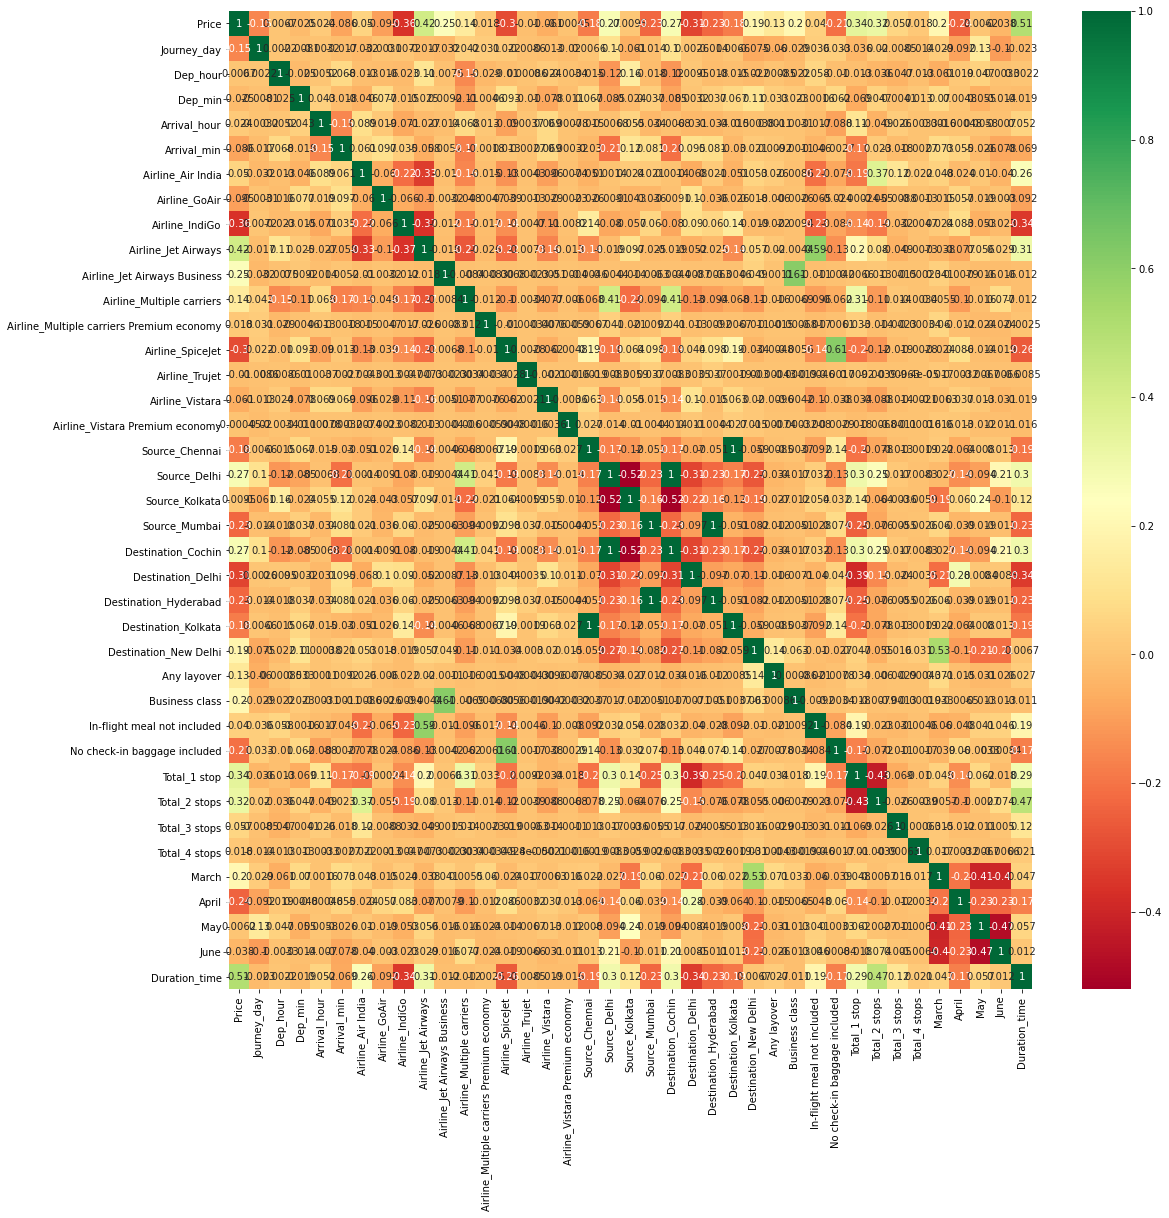

In [111]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [81]:
data_train.head()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Any layover,Business class,In-flight meal not included,No check-in baggage included,Total_1 stop,Total_2 stops,Total_3 stops,Total_4 stops
0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


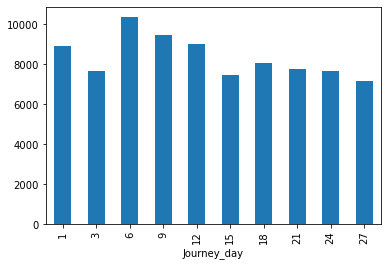

In [82]:
data_train.groupby('Journey_day')['Price'].median().plot(kind = 'bar') #No Significant Variation

## FITTING THE MODEL

In [112]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=27)

In [114]:
# Important feature using ExtraTreesRegressor

selection = ExtraTreesRegressor( n_jobs=-1,n_estimators = 500)
selection.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=500, n_jobs=-1)

In [115]:
selection.score(X_train,y_train)

0.9964313119341667

In [116]:
selection.score(X_test,y_test)

0.87391081040601

In [117]:
print(selection.feature_importances_)

[9.52255853e-02 1.99088020e-02 2.00267590e-02 2.37256136e-02
 1.84447939e-02 1.03279460e-02 1.31714876e-03 4.00793141e-03
 1.43290324e-01 9.65586481e-02 2.66450293e-02 8.44496822e-04
 1.34087785e-03 0.00000000e+00 4.90017431e-03 3.75351705e-05
 4.16952643e-04 3.69801611e-03 4.31598223e-03 1.49529801e-02
 3.92887732e-03 3.48264163e-02 1.44132354e-02 4.39023727e-04
 2.40684231e-02 4.22070191e-03 2.15422043e-03 7.48200463e-02
 5.85339203e-05 6.71860591e-02 4.64647532e-02 4.22191506e-03
 6.65432213e-05 3.07523083e-02 7.95035506e-03 7.49154900e-03
 5.06583049e-03 1.81885612e-01]


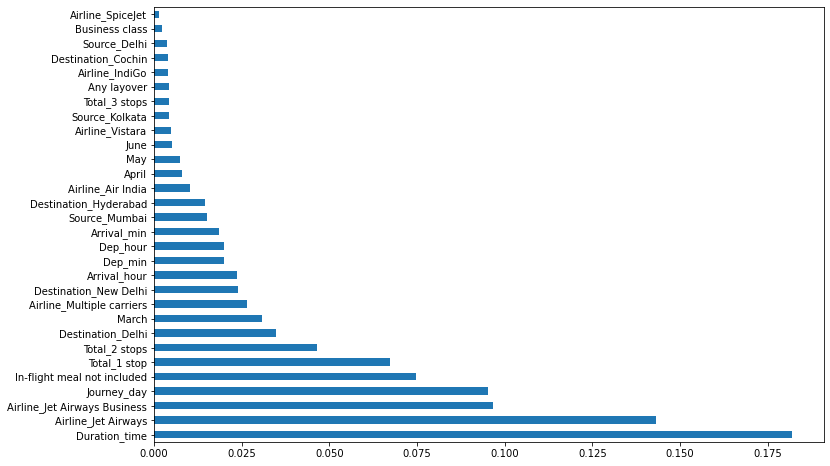

In [118]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()


In [119]:
X.columns

Index(['Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Any layover',
       'Business class', 'In-flight meal not included',
       'No check-in baggage included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Total_4 stops', 'March', 'April', 'May', 'June',
       'Duration_time'],
      dtype='object')

---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 72)

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:

reg_rf = RandomForestRegressor(n_jobs=-1, n_estimators = 500)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [123]:
y_pred = reg_rf.predict(X_test)

In [124]:
reg_rf.score(X_train, y_train)

0.9835038290902144

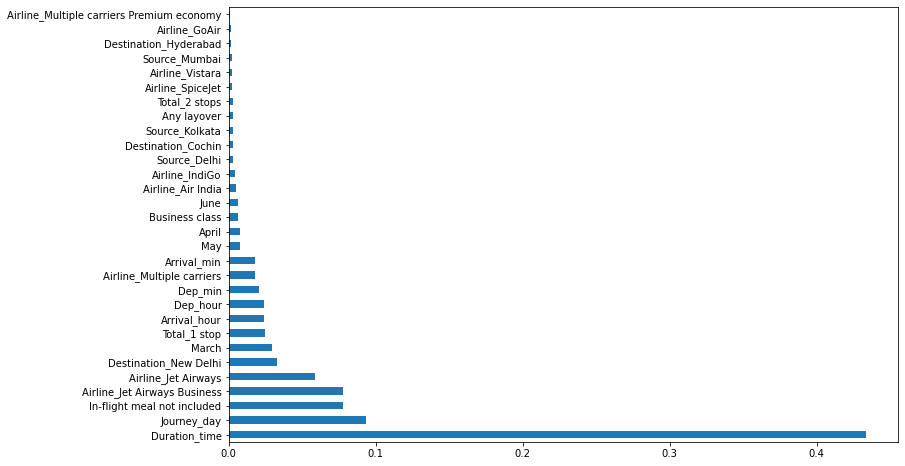

In [125]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

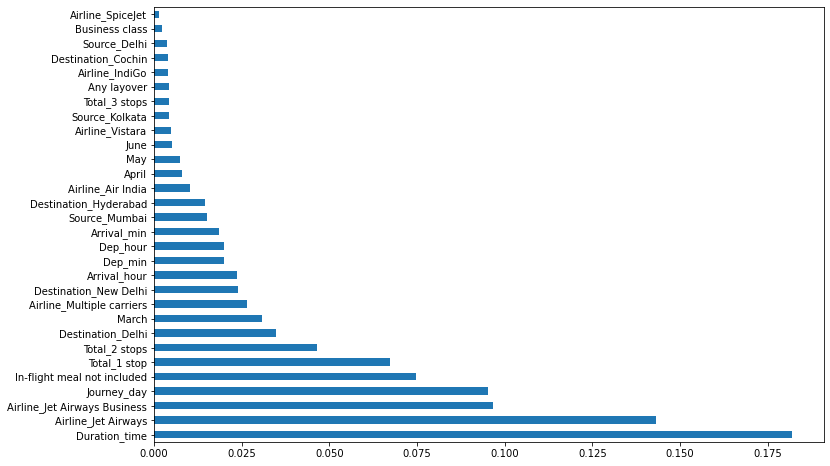

In [126]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


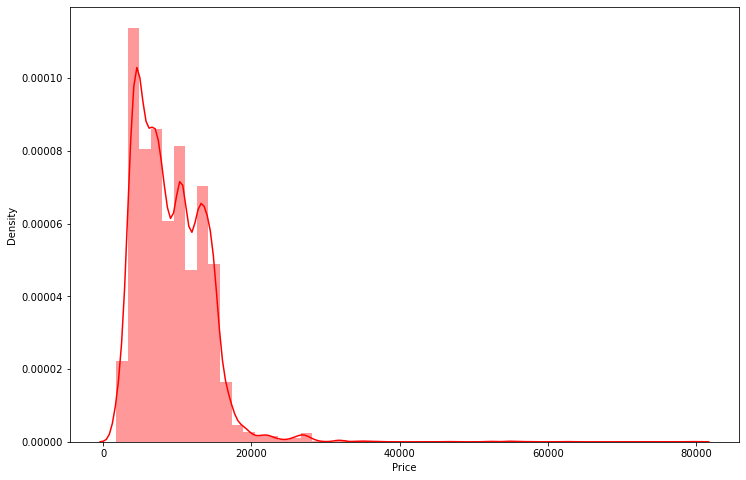

In [127]:
plt.figure(figsize = (12,8))

sns.distplot(y, kde=True, color='red')
plt.show()

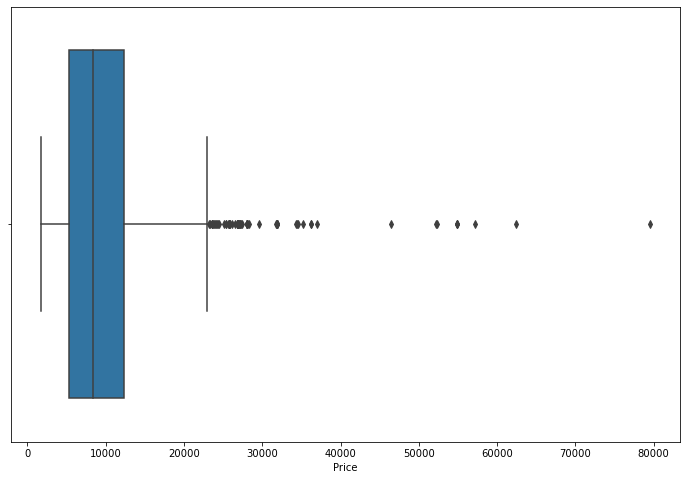

In [130]:
plt.figure(figsize = (12,8))

sns.boxplot(y)
plt.show()

396      36983
657      52229
1478     54826
1629     31783
2099     36235
2618     54826
2693     35185
2924     79512
3700     31825
5013     31825
5372     62427
5439     54826
5662     31825
5719     36235
6576     31825
6991     34273
7351     46490
7617     34503
8598     34608
9019     31825
9715     52285
10052    31945
10364    57209
10439    31825
Name: Price, dtype: int64

In [149]:
X.columns

Index(['Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Any layover',
       'Business class', 'In-flight meal not included',
       'No check-in baggage included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Total_4 stops', 'Duration_time', 'March', 'April',
       'May', 'June'],
      dtype='object')

In [128]:
# Important feature using ExtraTreesRegressor

selection = ExtraTreesRegressor(n_jobs=-1, n_estimators=500)
selection.fit(
    X[[
        'Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
        'Total_1 stop', 'Total_2 stops', 'Total_3 stops', 'Total_4 stops',
        'Duration_time','Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_Air India', 'Airline_Vistara'
    ]], y)

ExtraTreesRegressor(n_estimators=500, n_jobs=-1)

In [129]:
selection.score(X[[
        'Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
        'Total_1 stop', 'Total_2 stops', 'Total_3 stops', 'Total_4 stops',
        'Duration_time','Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_Air India', 'Airline_Vistara'
    ]],y)

0.9201593111077873

In [130]:
y_pred= selection.predict(X[[
        'Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
        'Total_1 stop', 'Total_2 stops', 'Total_3 stops', 'Total_4 stops',
        'Duration_time','Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_Air India', 'Airline_Vistara'
    ]])

train_data['res'] = train_data['Price'] - y_pred

In [153]:
train_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,res
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,-1295.333333
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,1050.000000
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,1168.000000
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,0.000000
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,19,55,22,25,2,30,-151.000000
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,20,45,23,20,2,35,0.000000
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,8,20,11,20,3,0,865.666667
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,11,30,14,10,2,40,0.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


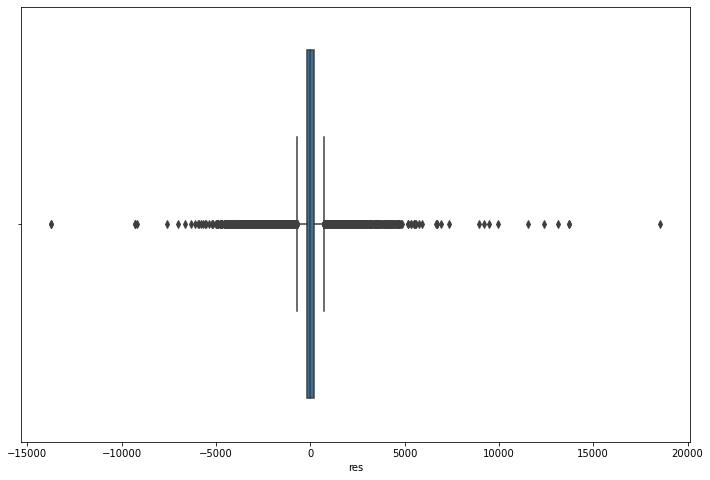

In [131]:
plt.figure(figsize = (12,8))

sns.boxplot(train_data['res'])
plt.show()

In [132]:
train_data['res'].describe()

count    1.068100e+04
mean    -1.428829e-12
std      1.302910e+03
min     -1.373900e+04
25%     -1.816667e+02
50%      0.000000e+00
75%      1.750000e+02
max      1.853333e+04
Name: res, dtype: float64

In [133]:
data_train['res'] = train_data['res']

In [134]:
data_train = data_train[data_train['res'] >= -3000 ]



In [135]:
data_train = data_train[data_train['res'] <= 3000 ]

In [136]:
data_train.shape

(10249, 40)

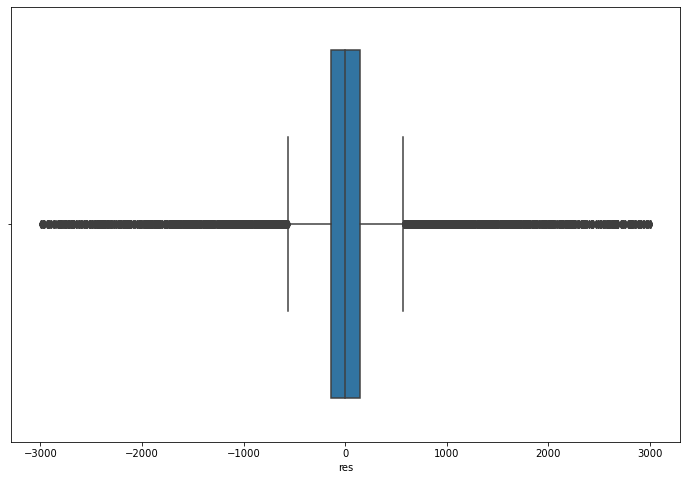

In [169]:
plt.figure(figsize = (12,8))

sns.boxplot(data_train['res'])
plt.show()

In [137]:
data_train.columns

Index(['Price', 'Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Any layover',
       'Business class', 'In-flight meal not included',
       'No check-in baggage included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Total_4 stops', 'March', 'April', 'May', 'June',
       'Duration_time', 'res'],
      dtype='object')

## So Total 4 stops, Airline Vistara and Spicejet, and No check in baggage and Anylayover is not Contributing

In [138]:
imp_features = [
    'Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
    'Airline_Air India', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
    'Airline_Multiple carriers', 'Source_Delhi', 'Source_Kolkata',
    'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
    'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
    'Business class', 'In-flight meal not included', 'Total_1 stop',
    'Total_2 stops', 'Total_3 stops', 'Duration_time', 'March', 'April', 'May',
    'June'
]

X = data_train[imp_features]
y = data_train['Price']

## FITTING THE MODEL

In [139]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=27)

In [141]:
# Important feature using ExtraTreesRegressor

selection = ExtraTreesRegressor( n_jobs=-1,n_estimators = 500)
selection.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=500, n_jobs=-1)

In [142]:
selection.score(X_train,y_train)

0.9961210481782456

In [143]:
selection.score(X_test,y_test) # Satisfactory Accuracy

0.9077056623715756

In [144]:
X.columns

Index(['Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Business class',
       'In-flight meal not included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Duration_time', 'March', 'April', 'May', 'June'],
      dtype='object')

In [145]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 72)

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:

reg_rf = RandomForestRegressor(n_jobs=-1, n_estimators = 500)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [149]:
y_pred = reg_rf.predict(X_test)

In [150]:
reg_rf.score(X_train, y_train)

0.9845492917879107

In [151]:
reg_rf.score(X_test, y_test)

0.8821370839297349

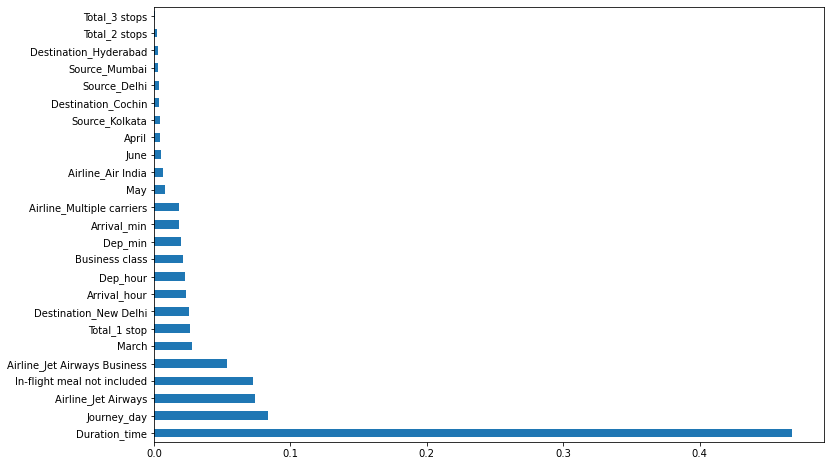

In [152]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [156]:
X.columns

Index(['Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Business class',
       'In-flight meal not included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Duration_time', 'March', 'April', 'May', 'June'],
      dtype='object')

In [204]:
reg_rf.score(X_test, y_test)

0.8845255985122706

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


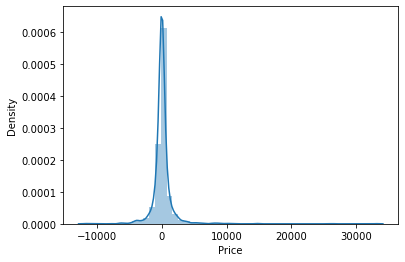

In [153]:
sns.distplot(y_test-y_pred)
plt.show()

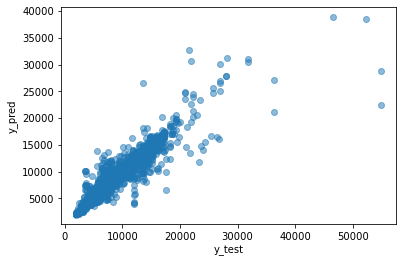

In [208]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [154]:
from sklearn import metrics

In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 719.0079810513528
MSE: 2676112.4880891577
RMSE: 1635.8827855592704


In [ ]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

In [211]:
metrics.r2_score(y_test, y_pred)

0.8845255985122706

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [212]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [213]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [216]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [217]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [228]:
pd.DataFrame(rf_random.cv_results_)['']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.245268,1.871341,1.126216,0.546418,900,5,5,sqrt,10,"{'n_estimators': 900, 'min_samples_split': 5, ...",-4.351557e+06,-4.940348e+06,-4.299843e+06,-3.200638e+06,-4.648876e+06,-4.288252e+06,590309.358965,7
1,23.320608,1.172035,1.570997,0.453206,1100,10,2,sqrt,15,"{'n_estimators': 1100, 'min_samples_split': 10...",-3.172265e+06,-3.244210e+06,-2.845553e+06,-2.110599e+06,-2.868960e+06,-2.848317e+06,401580.600223,4
2,13.500506,0.341994,0.917765,0.264312,300,100,5,auto,15,"{'n_estimators': 300, 'min_samples_split': 100...",-4.824730e+06,-5.127268e+06,-4.240444e+06,-3.276702e+06,-4.635057e+06,-4.420840e+06,640258.013788,8
3,23.432090,0.677487,1.240748,0.458691,400,5,5,auto,15,"{'n_estimators': 400, 'min_samples_split': 5, ...",-3.350490e+06,-3.572512e+06,-2.834481e+06,-2.076717e+06,-3.245834e+06,-3.016007e+06,527184.149182,5
4,37.488978,0.829361,1.493002,0.439568,700,5,10,auto,20,"{'n_estimators': 700, 'min_samples_split': 5, ...",-3.945669e+06,-4.301931e+06,-3.425440e+06,-2.469194e+06,-3.639586e+06,-3.556364e+06,618616.844586,6
5,33.202246,2.008905,1.808246,0.328460,1000,2,1,sqrt,25,"{'n_estimators': 1000, 'min_samples_split': 2,...",-2.383161e+06,-2.327805e+06,-2.106085e+06,-1.498441e+06,-2.060225e+06,-2.075143e+06,313840.203179,1
6,15.353300,1.492586,0.969560,0.499975,1100,15,10,sqrt,5,"{'n_estimators': 1100, 'min_samples_split': 15...",-7.688874e+06,-8.124355e+06,-7.613692e+06,-6.078788e+06,-7.563110e+06,-7.413764e+06,696428.454482,10
7,5.285082,1.285373,0.501747,0.247804,300,15,1,sqrt,15,"{'n_estimators': 300, 'min_samples_split': 15,...",-3.077366e+06,-2.934469e+06,-2.698884e+06,-2.029436e+06,-2.554290e+06,-2.658889e+06,363268.075880,3
8,8.020904,0.357997,0.801509,0.351634,700,10,2,sqrt,5,"{'n_estimators': 700, 'min_samples_split': 10,...",-7.501775e+06,-7.316101e+06,-7.067212e+06,-6.086198e+06,-6.953895e+06,-6.985036e+06,488314.616532,9
9,38.493953,10.766321,1.144443,0.682032,700,15,1,auto,20,"{'n_estimators': 700, 'min_samples_split': 15,...",-2.787850e+06,-2.539888e+06,-2.122902e+06,-1.562133e+06,-2.099904e+06,-2.222535e+06,419854.618658,2


In [218]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [204]:
reg_rf = RandomForestRegressor(n_estimators=200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 25, n_jobs = -1)

In [205]:
reg_rf.fit(X,y)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=200,
                      n_jobs=-1)

In [206]:
y_pred =  reg_rf.predict(X)

In [207]:
prediction = reg_rf.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


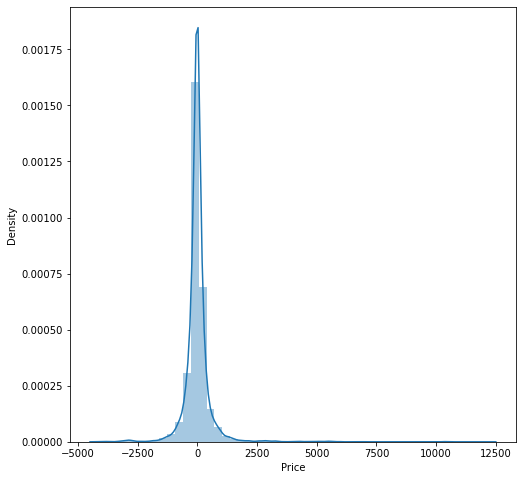

In [208]:
plt.figure(figsize = (8,8))
sns.distplot(y-y_pred)
plt.show()

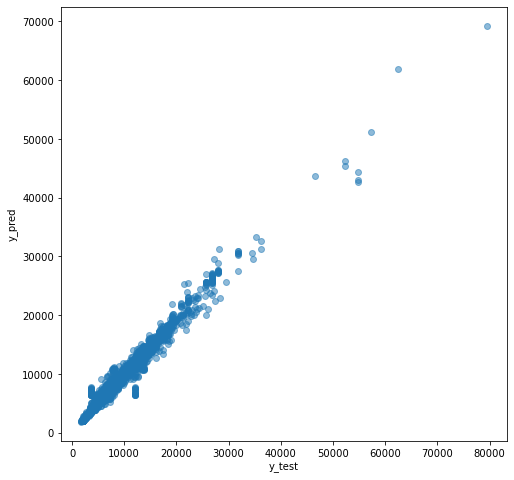

In [209]:
plt.figure(figsize = (8,8))
plt.scatter(y, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [210]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 301.52860373700076
MSE: 462139.08561751875
RMSE: 679.8081241185035


In [211]:
metrics.r2_score(y_test, prediction)

0.9796461992896944

In [212]:
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE: 276.7297713966198
MSE: 350302.71024815965
RMSE: 591.8637598705969


In [213]:
metrics.r2_score(y, y_pred)

0.9833391102491242

---

## Save the model to reuse it again

In [215]:
import joblib

In [216]:
file = open('flight_rf_200_2.sav', 'wb')

# dump information to that file
joblib.dump(reg_rf, file, compress=2)

In [201]:
data = pd.concat([X,y], axis=1)

In [203]:
data.to_csv('flight_final.csv')

In [1]:
import pickle
# open a file, where you ant to store the data


In [2]:
filename = 'finalized_model.sav'


In [3]:
loaded_model = pickle.load(open(filename, 'rb'))


In [243]:
model = open('flight_reg_rf.pkl','rb')
forest = pickle.load(model)

EOFError: Ran out of input

In [8]:
round(float(loaded_model.predict(l)),2)

12532.77

In [9]:
0 == 0.00

True

In [4]:
import numpy as np

In [7]:
l = np.array([25,12,45,15,30,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,2.75,0,1,0,0]).reshape(1,-1)
l.shape

(1, 27)

In [372]:
X.columns

Index(['Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Business class',
       'In-flight meal not included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Duration_time', 'March', 'April', 'May', 'June'],
      dtype='object')

In [370]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10249, dtype: int64

In [ ]:
l = np.array([24,0,15,4,45,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.84,1,0,0,0]).reshape(1,-1)

In [378]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,res,Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,-1295.333333,2.333333
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,1050.000000,7.833333
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,1168.000000,19.416667
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,0.000000,5.083333
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,0.000000,4.833333


In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)

In [250]:
train_data['Duration'] = train_data["Duration_hours"] + train_data["Dep_min"]/60

In [252]:
plot_data = train_data[['Price', 'Airline', 'Duration']]

In [254]:
plot_data.to_excel("plot_data.xlsx")

In [269]:
Airline = plot_data.groupby("Airline")["Price"].mean()

In [270]:
Duration = plot_data.groupby("Duration")["Price"].mean()

In [263]:
from plotly import graph_objs as go

In [277]:
fig = go.Figure(data= go.Bar(x=Airline.index, y= Airline.val

In [273]:
Airline.index

Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object', name='Airline')

In [279]:
fig

In [280]:
plt.figure(figsize=(10,8))
go.Figure(data=go.Area(x=Duration.index, y=Duration.values))
        

ValueError: Invalid property specified for object of type plotly.graph_objs.Area: 'x'

Did you mean "r"?

    Valid properties:
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            customdata .
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            hoverinfo .
        hoverlabel
            :class:`plotly.graph_objects.area.Hoverlabel` instance
            or dict with compatible properties
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            :class:`plotly.graph_objects.area.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        r
            Area traces are deprecated! Please switch to the
            "barpolar" trace type. Sets the radial coordinates for
            legacy polar chart only.
        rsrc
            Sets the source reference on Chart Studio Cloud for  r
            .
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.area.Stream` instance or
            dict with compatible properties
        t
            Area traces are deprecated! Please switch to the
            "barpolar" trace type. Sets the angular coordinates for
            legacy polar chart only.
        tsrc
            Sets the source reference on Chart Studio Cloud for  t
            .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        
Did you mean "r"?

Bad property path:
x
^

<Figure size 720x576 with 0 Axes>

In [281]:
Duration

Duration
1.000000      3401.242424
1.083333      3945.213592
1.166667      5203.900000
1.250000      2243.444444
1.333333      4743.831683
                 ...     
41.916667    13990.000000
42.333333    11664.000000
42.666667    12819.000000
47.166667    20694.000000
47.416667    20064.000000
Name: Price, Length: 367, dtype: float64

In [282]:
import plotly.express as px

In [301]:
fig = px.line(x=Duration.index, y=Duration.values, title='Average FlightFare by Duration of Flight', labels=dict(x="Flight Duration", y = "Average Flight Fare")
fig.show()

SyntaxError: invalid syntax (<ipython-input-301-a33033ebe162>, line 2)

In [302]:
dict(x="Flight Duration", y = "Average Flight Fare")

{'x': 'Flight Duration', 'y': 'Average Flight Fare'}

In [294]:
px.bar(x= Airline.index, y = Airline.values, title= "Average FlightFare by different Airlines")


In [306]:
Airline = pd.DataFrame({"Airline":Airline.index, "Average Fare":Airline.values})

In [307]:
px.bar(Airline, x= "Airline", y = "Average Fare", title= "Average FlightFare by different Airlines")

In [309]:
Duration = pd.DataFrame({"Duration":Duration.index, "Average Fare":Duration.values})

In [310]:
Duration

,Duration,Average Fare
0,1.000000,3401.242424
1,1.083333,3945.213592
2,1.166667,5203.900000
3,1.250000,2243.444444
4,1.333333,4743.831683
...,...,...
362,41.916667,13990.000000
363,42.333333,11664.000000
364,42.666667,12819.000000
365,47.166667,20694.000000


In [311]:
px.line(Duration, x="Duration", y="Average Fare", title="Average FlightFare by Duration of Flight")

In [312]:
round(17.675,2)

17.68

In [313]:
round(Airline['Average Fare'])

0      5590.0
1      9608.0
2      5861.0
3      5674.0
4     11644.0
5     58359.0
6     10903.0
7     11419.0
8      4338.0
9      4140.0
10     7796.0
11     8962.0
Name: Average Fare, dtype: float64

In [314]:
X.columns

Index(['Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Business class',
       'In-flight meal not included', 'Total_1 stop', 'Total_2 stops',
       'Total_3 stops', 'Duration_time', 'March', 'April', 'May', 'June'],
      dtype='object')

In [354]:
train_data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'Any layover', 'Business class'],
      dtype=object)

In [353]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [317]:
train_data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [319]:
train_data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [323]:
import datetime

In [329]:
d = datetime.date(2004,9,4)

In [333]:
type(d)

datetime.date

In [335]:
type(pd.to_datetime(d).month)

int

In [337]:
t = datetime.time(22,10)

In [345]:
t1 = datetime.time(0,15)

In [351]:
datetime.timedelta(t1 - t)

TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

---